#This is Caleb Kirkland's (cok18@msstate.edu) code for CSE 4633 - Artificial Intelligence: Assignment 2


####Question 1: Implement a CNN classifier for the MNIST dataset. You may use any structure for CNN.

In [1]:
import numpy as np
import keras

In [2]:
## Loading the MNIST dataset
from keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
## Get the image shape:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


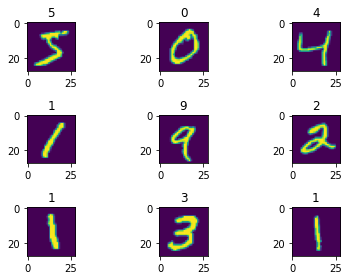

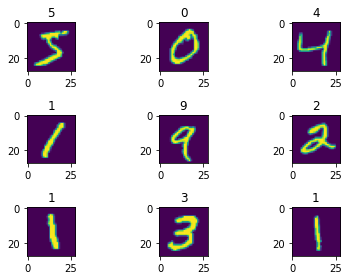

In [4]:
## Showing some of the images in the training dataset
import matplotlib.pyplot as plt
digits = plt.figure()
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i])
  plt.title(y_train[i])
digits

In [5]:
## Reshaping the data to fit the model easier
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
## Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [6]:
## One-Hot encode the Y values into ones and zeros, making each number categorical
from keras.utils import to_categorical
print("Before encoding: {}".format(y_train[0]))
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print("After Econding: {}".format(y_train[0]))

Before encoding: 5
After Econding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
## Build the neural network. Each layer is a different type of neuron.
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(64, kernel_size=3, 
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3,
                 activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [8]:
## Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
## Training the network, we'll go with epochs=3
model.fit(x_train, y_train,
          batch_size=64,
          validation_data = (x_test, y_test),
          epochs=3)

Epoch 1/3
938/938 [==============================] - 6s 6ms/step - loss: 0.3109 - accuracy: 0.9049 - val_loss: 0.0636 - val_accuracy: 0.9803
Epoch 2/3
938/938 [==============================] - 5s 5ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.0425 - val_accuracy: 0.9863
Epoch 3/3
938/938 [==============================] - 5s 5ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0408 - val_accuracy: 0.9872


In [9]:
## Running the model on the test data and printing the accuracy results.
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9872
[0.040824342519044876, 0.9872000217437744]
